<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Préambule-et-imports-" data-toc-modified-id="-Préambule-et-imports--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Préambule et imports </a></span></li><li><span><a href="#--traitement-d'images-avec-numpy-" data-toc-modified-id="--traitement-d'images-avec-numpy--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>  traitement d'images avec numpy </a></span></li><li><span><a href="#-Lecture-du-fichier-csv-" data-toc-modified-id="-Lecture-du-fichier-csv--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Lecture du fichier csv </a></span></li><li><span><a href="#-Modification-d'une-image-" data-toc-modified-id="-Modification-d'une-image--4"><span class="toc-item-num">4&nbsp;&nbsp;</span> Modification d'une image </a></span></li><li><span><a href="#-Distance-entre-deux-images-" data-toc-modified-id="-Distance-entre-deux-images--5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Distance entre deux images </a></span></li><li><span><a href="#-Algorithme-de-reconnaissance-" data-toc-modified-id="-Algorithme-de-reconnaissance--6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Algorithme de reconnaissance </a></span></li><li><span><a href="#-Se-créer-ses-propres-images-" data-toc-modified-id="-Se-créer-ses-propres-images--7"><span class="toc-item-num">7&nbsp;&nbsp;</span> Se créer ses propres images </a></span></li><li><span><a href="#-Prolongement-:-l'algorithme-complet-des-k-plus-proches-voisins-(programme-de-NSI)-" data-toc-modified-id="-Prolongement-:-l'algorithme-complet-des-k-plus-proches-voisins-(programme-de-NSI)--8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Prolongement : l'algorithme complet des k plus proches voisins (programme de NSI) </a></span></li></ul></div>

<h2> Préambule et imports </h2>

Ce TP permet de travailler de nombreux thèmes :
<ul>
    <li> Le traitement d'images </li>
    <li> La lecture d'un fichier csv </li>
</ul>


Il faut avoir dans le même répertoire, les fchiers "mnist_test.csv" et "mnist_train_100.csv" qui correspondent à la base d'entraînement de l'algorithme et à la base de tests.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from random import *  

<h2>  traitement d'images avec numpy </h2>

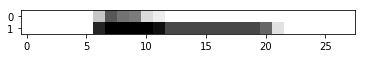

In [4]:
# Création d'une matrice deux lignes et 28 colonnes avec des nuances de gris

Test=np.array([[  0.,   0.,   0.,   0.,   0.,   0.,  84., 185., 159., 151.,  60.,
         36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 222., 254., 254., 254., 254.,
        241., 198., 198., 198., 198., 198., 198., 198., 198., 170.,  52.,
          0.,   0.,   0.,   0.,   0.,   0.]])

# Affichage de cette image : 

plt.imshow(Test, cmap='Greys', interpolation='None')
plt.show()

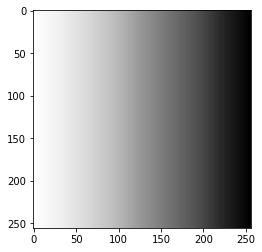

In [5]:
# Création d'une matrice 256,256 des niveaux de gris. Affichage par imshow


Liste=[i for i in range(256)]

data=np.array([Liste for i in range(256)])
plt.imshow(data, cmap='Greys', interpolation='None')
plt.show()


<h2> Lecture du fichier csv </h2>

Le fichier CSV est formé de lignes structurées de la façon suivante :
- Le premier élément est un nombre.
- Il y a ensuite $28 \times  28=784$ nombres qui correspondent à la représentation du premier élément.
- Le fichier est au format csv, le séparateur est la virgule.

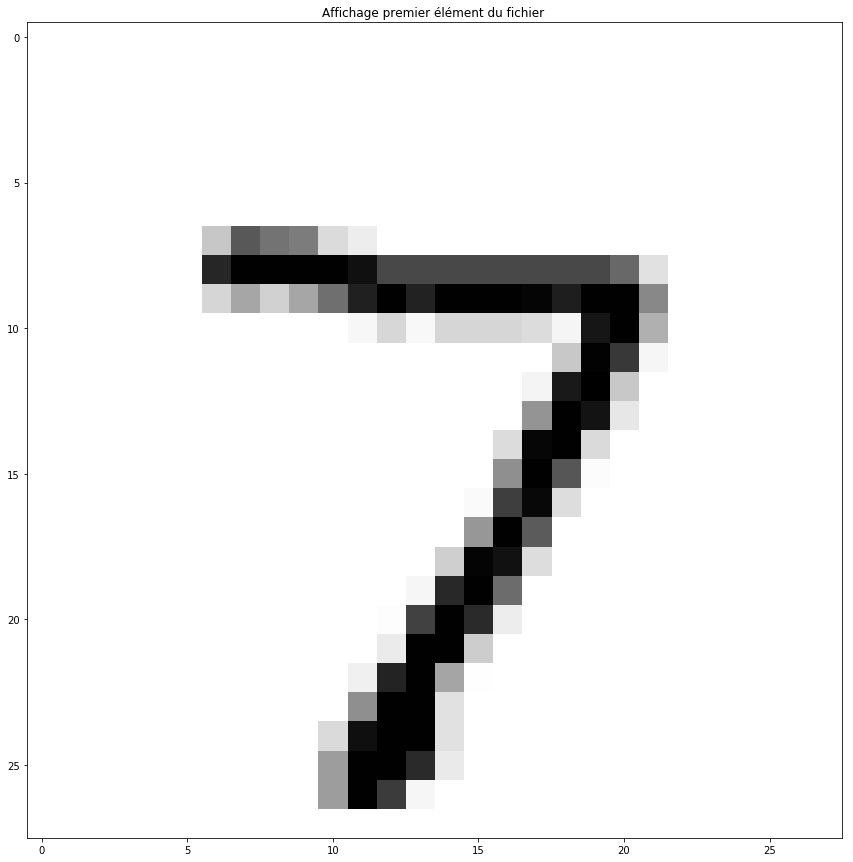

In [6]:
def affiche(txt,tab_image):
    "Affiche une fenetre avec le texte et le tableau sous forme d'image"
    plt.figure(figsize=(15,15));
    plt.title("%s "%str(txt))
    plt.imshow(tab_image, cmap='Greys', interpolation='None')
    plt.show()


def chargement(nom_fichier):
    "Charge le fichier csv et renvoie la liste des valeurs et la liste des images qui y sont présentes"
    f = open(nom_fichier, 'r')
    a = f.readlines()
    f.close()

    liste_valeurs,liste_images=[],[]
    for line in a:
        linebits = line.split(',')
        liste_valeurs.append(int(linebits[0]))
        liste_images.append(np.asfarray(linebits[1:]).reshape((28,28))) # Transforme les nombres en une matrice 28 par 28

    return liste_valeurs,liste_images

liste_valeurs,liste_images=chargement("mnist_test.csv")

affiche('Affichage premier élément du fichier',liste_images[0])


In [7]:
liste_valeurs[0]

7

<h2> Modification d'une image </h2>

In [8]:
# La matrice qui correspond au chiffre 7

Image7=np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  84., 185., 159., 151.,  60.,
         36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., 222., 254., 254., 254., 254.,
        241., 198., 198., 198., 198., 198., 198., 198., 198., 170.,  52.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  67., 114.,  72., 114., 163.,
        227., 254., 225., 254., 254., 254., 250., 229., 254., 254., 140.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         17.,  66.,  14.,  67.,  67.,  67.,  59.,  21., 236., 254., 106.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  83., 253., 209.,  18.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  22., 233., 255.,  83.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 129., 254., 238.,  44.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  59., 249., 254.,  62.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 133., 254., 187.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   9., 205., 248.,  58.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 126., 254., 182.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  75., 251., 240.,  57.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  19., 221., 254., 166.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3., 203., 254., 219.,  35.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  38., 254., 254.,  77.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         31., 224., 254., 115.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        133., 254., 254.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  61.,
        242., 254., 254.,  52.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.,
        254., 254., 219.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 121.,
        254., 207.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]])

In [9]:
Image7.shape # dimensions de la matrice

(28, 28)

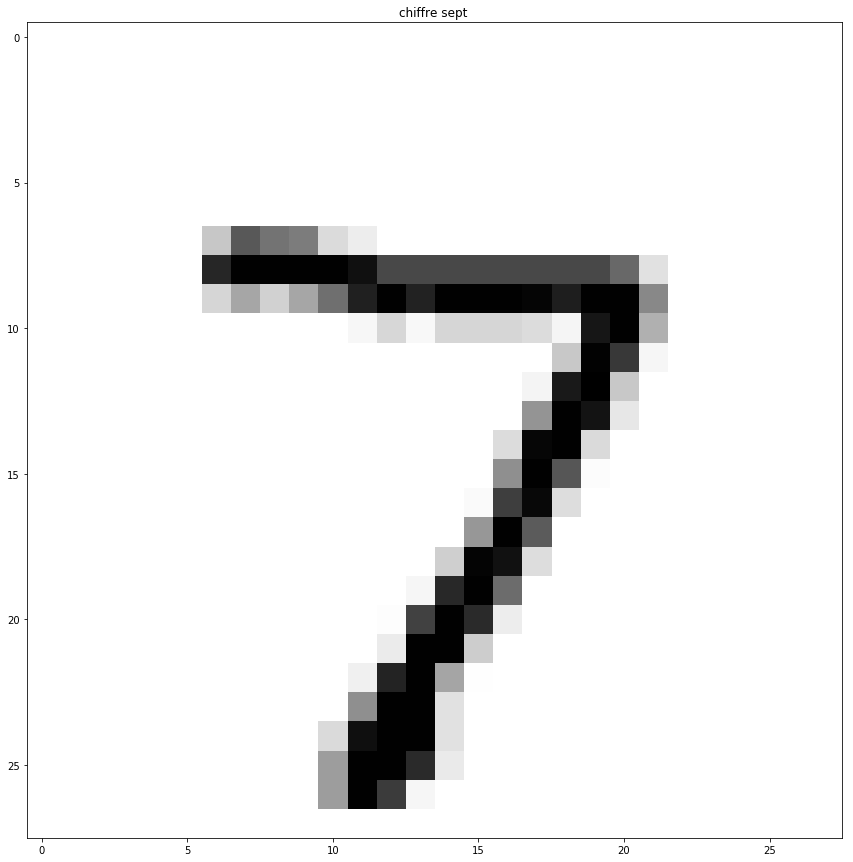

In [10]:
affiche('chiffre sept',Image7)

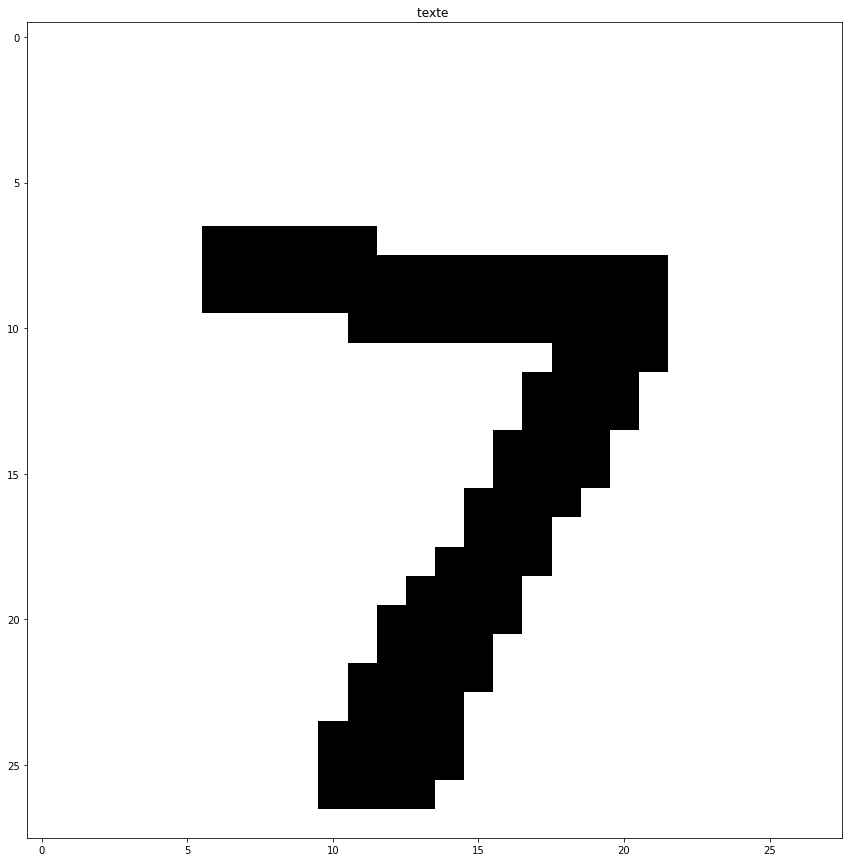

In [11]:
# On cherche à modifier le chiffre 7 en retirant les nuances de gris. Les pixes sont blancs ou noires.

Image7Modif=np.copy(Image7)

Image7Modif[Image7Modif !=0]=255

affiche('texte',Image7Modif)

<h2> Distance entre deux images </h2>

In [12]:
def distance(img1,img2):
    "Renvoie la distance entre deux images"
    "On calcule la moyenne des écarts entre chaque pixels"
    "Cette fonction gagnera à être programmée par les élèves selon leurs propres idées"
    imgdiff=abs(img1-img2)  #La matrice des écarts
    return imgdiff.mean()   #On renvoie la moyenne de ces écarts.


# On peut créer d'autres distances.


In [13]:
distance(Image7,Image7)

# Question : interpréter ce résultat

0.0

In [14]:
distance(Image7,Image7Modif)

14.191326530612244

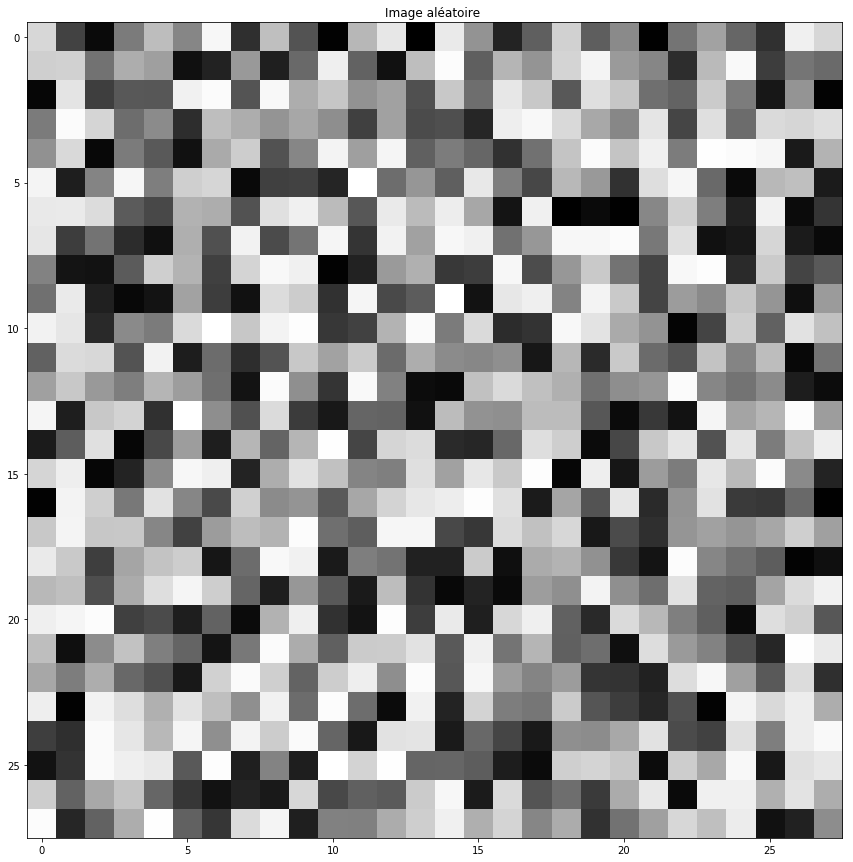

In [17]:
# Création d'une image aléatoire.

Erreur=np.array([np.random.randint(0, 256,28) for i in range(28)])
affiche('Image aléatoire',Erreur)

<h2> Algorithme de reconnaissance </h2>

Cet algorithme s'appelle l'algorithme des k plus proches voisins. C'est un algorithme utilisé en intelligence artificielle.

In [18]:
def K_PlusProchesVoisins(mon_image,limg,lval,k=10):
    # la valeur de k correspond aux nombres de voisins dans la base
    ldistval=[] # liste de la distance et de la valeur de chacune des images de la liste limg à mon_image
    for i in range(len(lval)):
        ldistval.append([distance(mon_image,limg[i]),lval[i]])
    ldistval.sort() # On trie cette liste selon les distances

    # print(ldistval) pour debug
    
    ListeK=[]
    for i in range(k):
        ListeK.append(ldistval[i][1])
    
    # print(ListeK) pour debug
    
    nb=[ListeK.count(i) for i in range(10)]
    return nb.index(max(nb))


In [19]:
liste_valeurs,liste_images=chargement("mnist_test.csv") # Partie entraînement de l'algorithme

mon_image=Image7Modif # On teste le 7 modifié.
limg=liste_images
lval=liste_valeurs

K_PlusProchesVoisins(mon_image,limg,lval,k=27)



7

In [20]:
# Maintenant, on teste notre image aléatoire.

K_PlusProchesVoisins(Erreur,limg,lval,k=10)

# Question : qu'en pensez-vous ?

2

In [22]:
# Création d'une image vide et test. 

ImageVide=np.array([[0 for i in range(28)] for i in range(28)])
K_PlusProchesVoisins(ImageVide,limg,lval,k=10)

# Question : qu'en pensez-vous ?

1

<h2> Se créer ses propres images </h2>

In [24]:
# Création d'un trait vertical pour se rapprocher de 1.

l=np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ImageTest=np.array([l for i in range(28)])

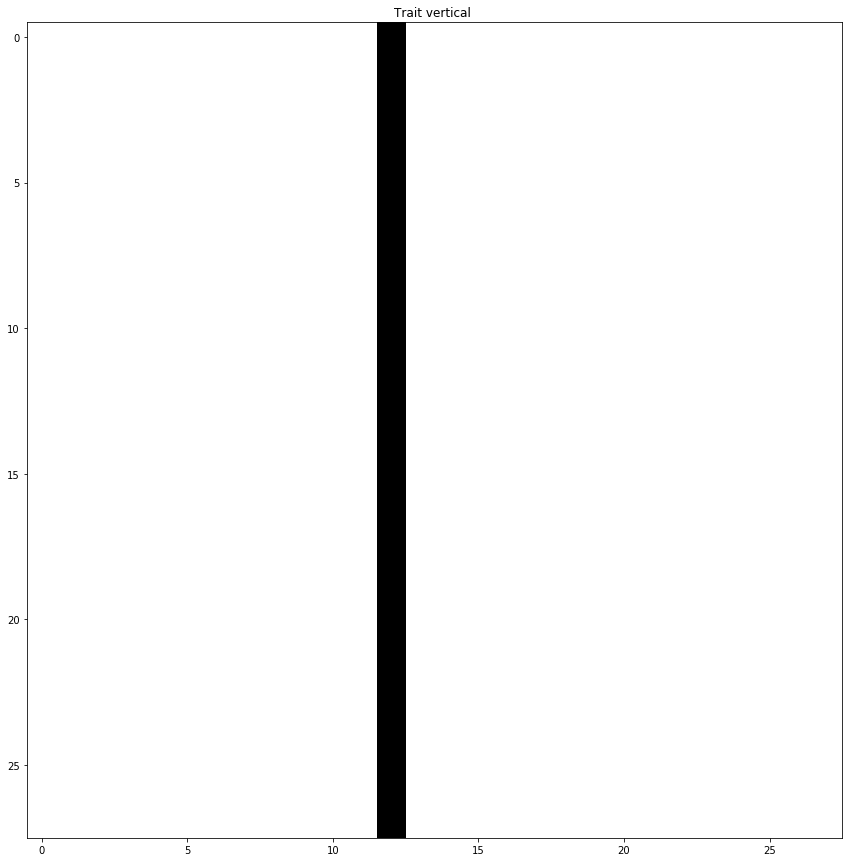

In [25]:
affiche('Trait vertical',ImageTest)

In [26]:
K_PlusProchesVoisins(ImageTest,limg,lval,k=4)

# Question : cela est-il conforme à vos attentes ?

1

C'est à vous de créer vos propres images et de faire des tests. Penser à créer des images simples. Quelques idées : une image  noire, une forme ronde, ovale, etc.

Entrer une valeur de i15
Affichage  de l'élément 16 du fichier


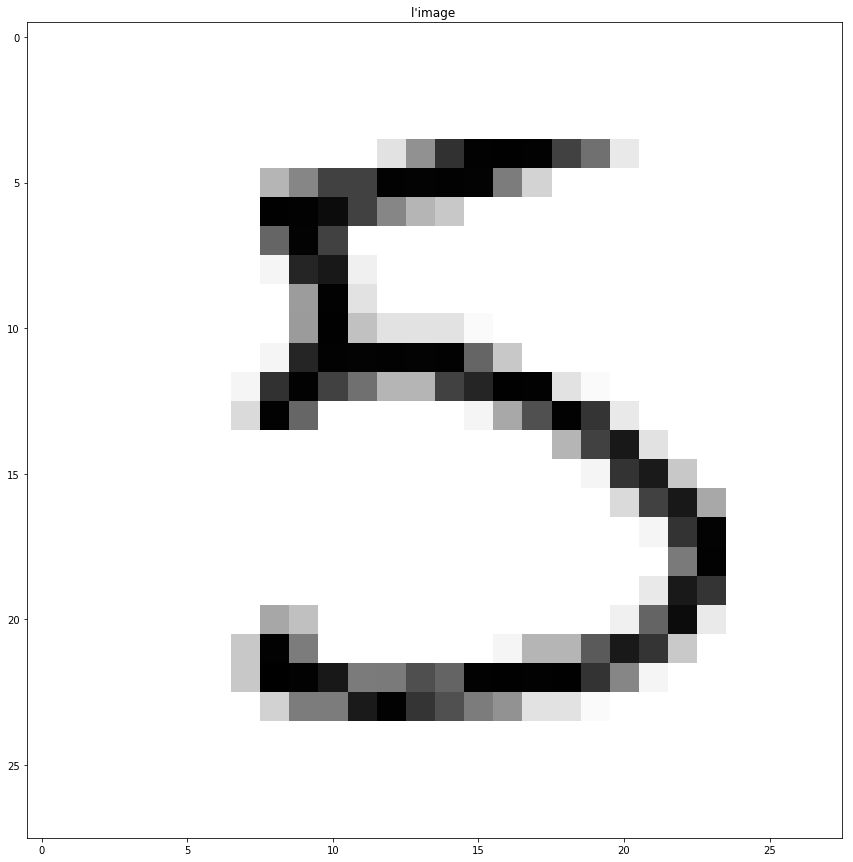

In [36]:
# Vous pouvez partir sur des images du fichier csv, par exemple liste_images[10] 

liste_valeurs,liste_images=chargement("mnist_test.csv")
i=int(input("Entrer une valeur de i"))
print("Affichage  de l'élément",i+1,"du fichier")
affiche("l'image",liste_images[i])

In [37]:
# Pour avoir l'image sous la forme d'une matrice de nombres

liste_images[i]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  51., 132., 214., 253., 254., 253., 203., 162.,  41.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

Pour pouvez faire des recherches sur la bibliothèque Numpy afin créer des matrices particulières.

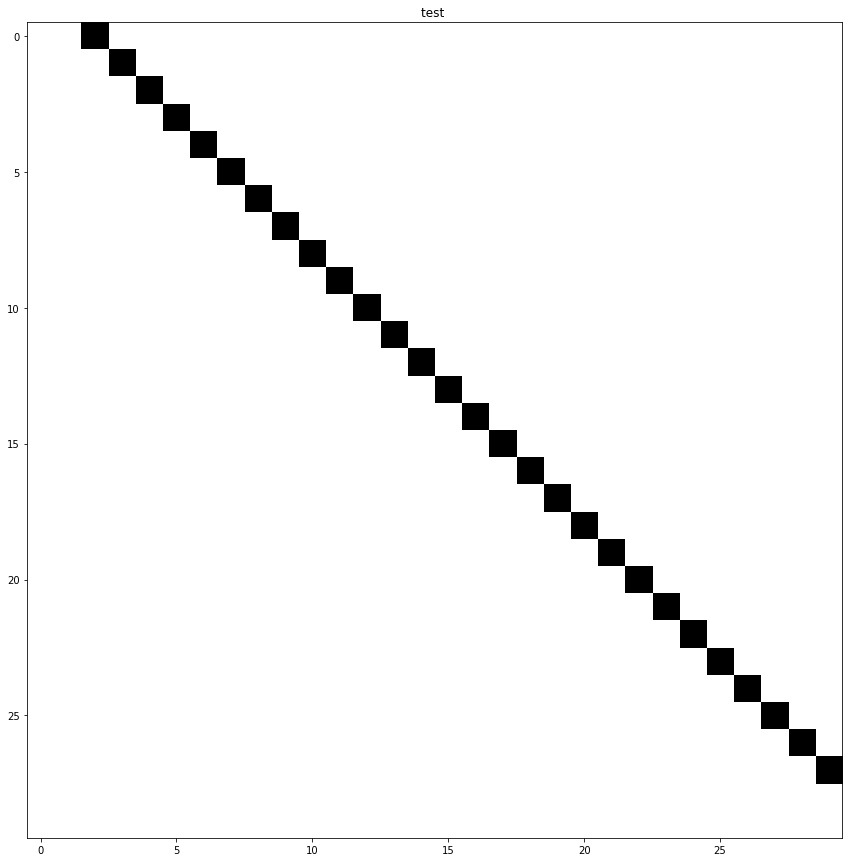

In [43]:
# Un exemple de diagonale décalée

ligne=np.ones(28)*155 # Création d'une ligne à 1 et multiplication par 128
ImageTest=np.diag(ligne,2) # Création d'une matrice avec comme diagonale les valeurs du dessus

affiche('test',ImageTest)

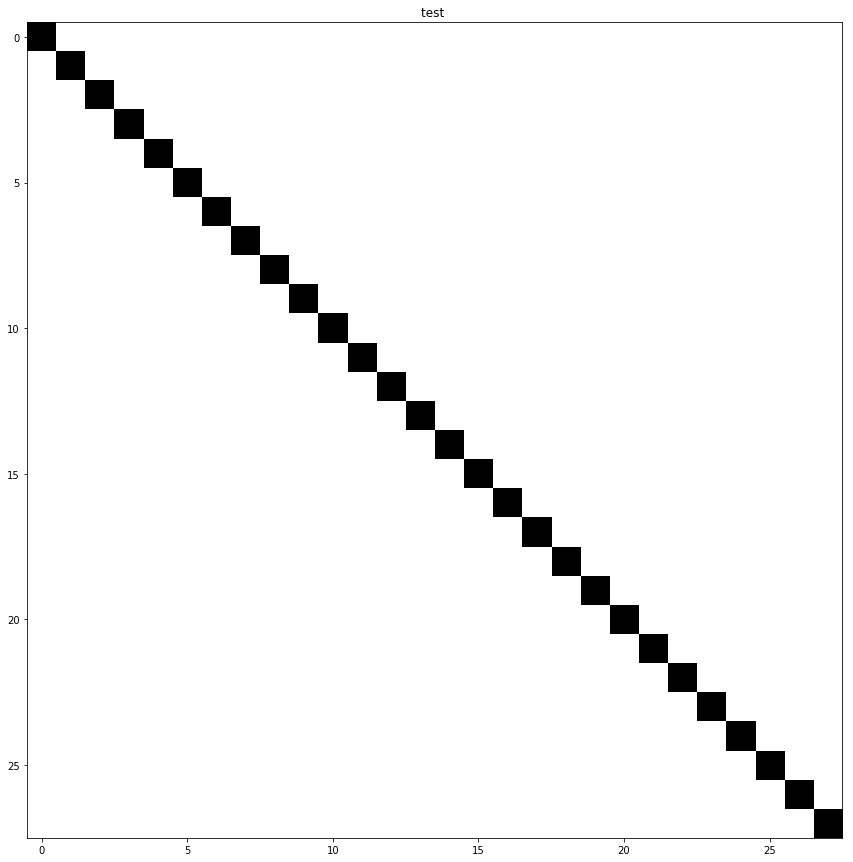

In [44]:
# Un autre exemple


ImageTest=np.eye(28)*155 # Création d'une matrice 

affiche('test',ImageTest)

<h2> Prolongement : l'algorithme complet des k plus proches voisins (programme de NSI) </h2>

Chargement de tous les exemples d'apprentissages


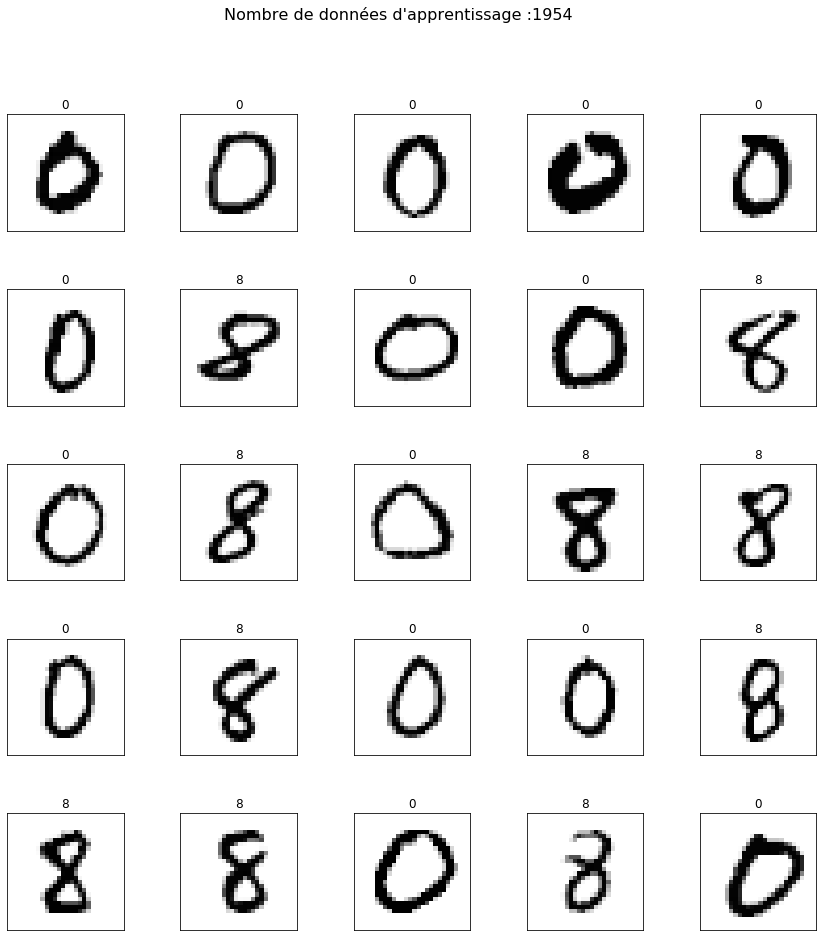

Chargement des données pour les tests
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 0 chiffres 0 et  10 chiffres 8
Parmis les 10 plus proches voisins de mon_image il y a 10 chiffres 0 et  0 chiffres 8
Parmis les 10 pl

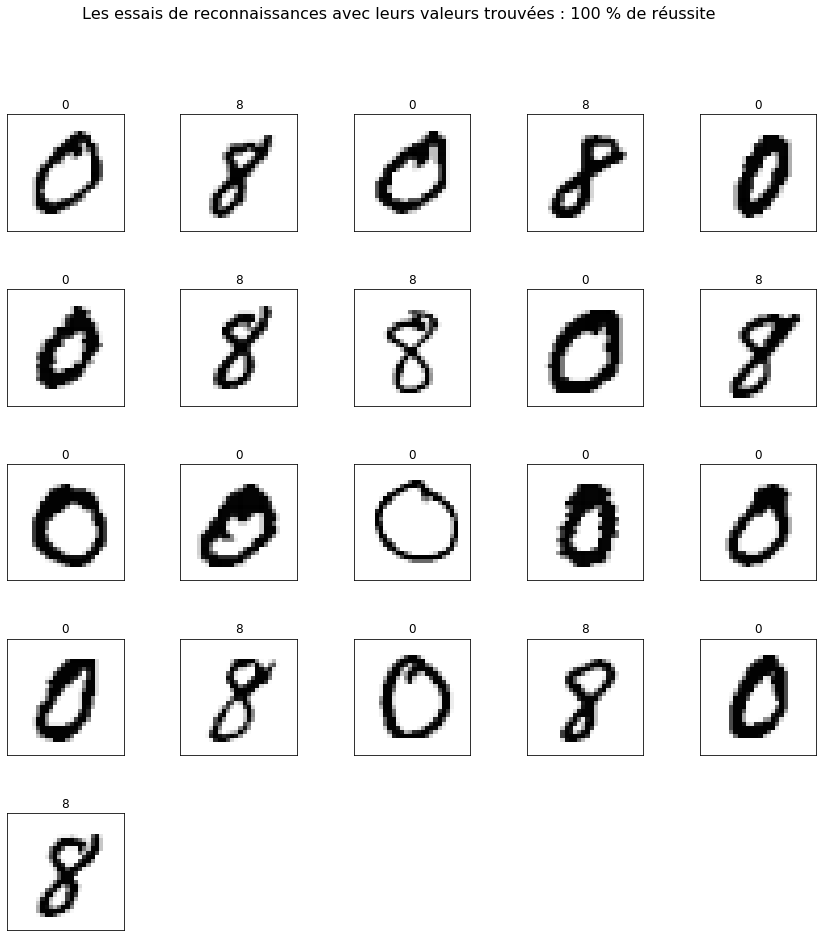

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from random import *

# Algorithme écrit par Goery VALANCE

def affiche(txt,tab_image):
    "Affiche une fenetre avec le texte et le tableau sous forme d'image"
    plt.figure(figsize=(15,15));
    plt.title("%s "%str(txt))
    plt.imshow(tab_image, cmap='Greys', interpolation='None')
    plt.show()

def Affiche_listes(ltxt,ltab_image,titre=""):
    "Affiche une fenetre avec les premiers éléments des listes textes et image"
    plt.figure(figsize=(15,15));
    plt.suptitle(titre, fontsize=16)
    for i in range(min(25,len(ltxt))):
        ax=plt.subplot(5,5,i+1)
        plt.subplots_adjust(hspace=0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([]) #Pour enlever les labels des axes https://www.science-emergence.com/Articles/Supprimer-les-labels-des-axes-sous-matplotlib/
        ax.xaxis.set_visible(False) #http://www.python-simple.com/python-matplotlib/configuration-axes.php
        ax.yaxis.set_visible(False)
        plt.title(str(ltxt[i])) #Le str est là pour convertir si jamais les txt étaient des nombres
        plt.imshow(ltab_image[i], cmap='Greys', interpolation='None')

    plt.show()

def chargement(nom_fichier):
    "Charge le fichier csv et renvoie la liste des valeurs et la liste des images qui y sont présentes"
    f = open(nom_fichier, 'r')
    a = f.readlines()
    f.close()

    liste_valeurs,liste_images=[],[]
    for line in a:
        linebits = line.split(',')
        liste_valeurs.append(int(linebits[0]))
        liste_images.append(np.asfarray(linebits[1:]).reshape((28,28)))

    return liste_valeurs,liste_images

def liste_extraites(lval,limg,val1=0,val2=1):
    "renvoie la liste des valeurs et la liste des images correspondant aux seules valeurs val1 et val2"
    lvalr,limgr=[],[]
    for k in range(len(lval)):
        if lval[k]==val1 or lval[k]==val2:
            lvalr.append(lval[k])
            limgr.append(limg[k])
    return lvalr,limgr

def valeur_par_kplusprochesvoisins(mon_image,lval,limg,k=10,val1=0,val2=1,mode_debug=False):
    "Renvoie une valeur estimée du chiffre représentée par mon_image à partir des exemples des listes d'images et de valeurs lval et limg "
    "Cela en appliquant l'algorithme des k plus proches voisins"
    "Le mode_debug permet de faire des tests de retour par la console"

    ldistval=[] # liste de la distance et de la valeur de chacune des images de la liste limg à mon_image
    for i in range(len(lval)):
        dist=distance(mon_image,limg[i])  # Distance de mon image à l'image N°i
        val=lval[i]                        # Valeur de cett image
        ldistval.append([dist,val])        # on ajoute dans la liste la distance et la valeur
    ldistval.sort()                        # On trie la liste selon les distances

    nb1,nb2=0,0 # Nb d'estmations de val1 ou val2
    for i in range(k): #Pour les k plus proches voisins
        if ldistval[i][1]==val1 : nb1=nb1+1 #On compte le nombre de fois où val1 se trouve dans les k plus proches voisins
        if ldistval[i][1]==val2 : nb2=nb2+1

    if mode_debug:
        print("Parmis les %d plus proches voisins de mon_image il y a %d chiffres %d et  %d chiffres %d"%(k,nb1,val1,nb2,val2))

    if nb1>nb2: return val1
    else: return val2

def distance(img1,img2):
    "Renvoie la distance entre deux images"
    "On calcule la moyenne des écarts entre chaque pixels"
    "Cette fonction gagnera à être programmée par les élèves selon leurs propres idées"
    imgdiff=abs(img1-img2)  #La matrice des écarts
    return imgdiff.mean()   #On renvoie la moyenne de ces écarts.

def demo(v1=0,v2=1):
    "Fais une démo de l'algorithme avec la reconnaissance des seuls chiffres v1 et v2"
    print("Chargement de tous les exemples d'apprentissages")
    lv,li=chargement("mnist_test.csv")   #lv et li sont des listes portant sur 10 chiffres
    lval,limage=liste_extraites(lv,li,v1,v2)       #lval et limage sont des listes ne portant que sur deux chiffres
    Affiche_listes(lval,limage,"Nombre de données d'apprentissage :%d"%len(lval))
    #affiche(lval[0],limage[0])

    print("Chargement des données pour les tests")
    lv,li=chargement("mnist_train_100.csv")
    lvalessai,limessai=liste_extraites(lv,li,v1,v2)
    #print("Nombre de données à tester :%d"%len(lvalessai))
    #affiche(lvalessai[0],limessai[0])

    nb_bonnes_reponses=0
    lval_reponse,ltxt_reponse=[],[]
    for i in range(0,len(lvalessai)):

        lval_reponse.append(valeur_par_kplusprochesvoisins(limessai[i],lval,limage,k=10,val1=v1,val2=v2,mode_debug=True))

        if lvalessai[i]==lval_reponse[i] :
            ltxt_reponse.append("Résussi")
            nb_bonnes_reponses=nb_bonnes_reponses+1
        else :ltxt_reponse.append("Echec:%d"%lval_reponse[i])

    Affiche_listes(lval_reponse,limessai,"Les essais de reconnaissances avec leurs valeurs trouvées : %1.0f %% de réussite"%(100.0*nb_bonnes_reponses/len(lval_reponse)))

demo(0,8)